<a href="https://colab.research.google.com/github/andrezma/GridSafe-AI/blob/main/PRUEBA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd
!ls

/content
drive  sample_data


In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# --- Carga del Dataset de Fallas *** ---

In [ ]:
dataset_path = '/content/drive/MyDrive/MAESTRIA-CODING/TRABAJO DE GRADO/COLAB_NOTEBOOKS/DATA/unplanned-outages.csv'
try:
  outages_df = pd.read_csv(dataset_path)
  print("Dataset loaded successfully!")
  # print(outages_df.head()) # Display the first few rows
except FileNotFoundError:
  print(f"Error: The file '{dataset_path}' was not found. Please check the path.")
except Exception as e:
  print(f"An error occurred while loading the dataset: {e}")

<ipython-input-47-6eba4fdf7a60>:3: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  outages_df = pd.read_csv(dataset_path)


Dataset loaded successfully!


# --- Inspección Inicial ---

In [ ]:
print("--- Información del Dataset de Fallos ---")
outages_df.info()

--- Información del Dataset de Fallos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294173 entries, 0 to 294172
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ﻿Incident Duration            294173 non-null  int64  
 1   Exceptional Event ID          5075 non-null    float64
 2   Network_type                  294173 non-null  object 
 3   Customer Affected             294172 non-null  float64
 4   Direct Cause Category         294154 non-null  object 
 5   Direct Cause                  294173 non-null  object 
 6   District Code                 294173 non-null  int64  
 7   District Name                 294173 non-null  object 
 8   Incident Date-time            294172 non-null  object 
 9   Restoration Date-time         294173 non-null  object 
 10  Exceptional Event EndDate     5075 non-null    float64
 11  Exceptional Event Start Date  5075 non-null    object 
 12  In

In [ ]:
print("\n--- Primeras Filas ---")
outages_df.head()


--- Primeras Filas ---


,﻿Incident Duration,Exceptional Event ID,Network_type,Customer Affected,Direct Cause Category,Direct Cause,District Code,District Name,Incident Date-time,Restoration Date-time,...,Main_Equipment_Involved_2,Main_Equipment_Involved_3,Main_Equipment_Involved_4,Main_Equipment_Involved_5,Main_Equipment_Involved_6,Primary Substation,Incident Reference Number,Voltage,Total Customer Minutes Lost,geometry
0,1976,NaN,HV,4.0,Unclassified or Unknown,Cause Unknown,41,Preston,2019-09-10T17:51:00+01:00,2019-09-12T02:47:00+01:00,...,"Indoor, Kiosk, Underground S/S, Pit or Chamber",Transformer (excluding 5),No lightning protection,NaN,NaN,400399,100117,6.6,1420,"53.79097112755595, -2.658393118633486"
1,101,NaN,HV,28.0,Unclassified or Unknown,Transient Fault - No Repair,41,Preston,2019-09-18T20:21:00+01:00,2019-09-18T22:02:00+01:00,...,Above 25Al/16Cu and up to 50Al/32Cu,Aluminium,Single Circuit - Horizontal,NaN,NaN,400225,100120,11,2828,"53.64815339452349, -2.626590605095577"
2,3,NaN,HV,667.0,Companies,Interruption to remove local generator or rest...,41,Preston,2019-09-19T02:46:00+01:00,2019-09-19T02:49:00+01:00,...,Mixed or unclassified,NaN,NaN,NaN,NaN,400413,100123,6.6,2001,"53.77328615020091, -2.7240197288766543"
3,85,NaN,HV,2.0,Unclassified or Unknown,Cause Unknown,41,Preston,2019-09-20T16:25:00+01:00,2019-09-20T17:50:00+01:00,...,Above 25Al/16Cu and up to 50Al/32Cu,Copper Cadmium,Single Circuit - Horizontal,NaN,NaN,400101,100124,6.6,170,"53.7465191041005, -2.995734576477219"
4,76,NaN,HV,1.0,Unclassified or Unknown,Transient Fault - No Repair,41,Preston,2019-09-20T22:43:00+01:00,2019-09-20T23:59:00+01:00,...,Above 25Al/16Cu and up to 50Al/32Cu,Aluminium,Single Circuit - Horizontal,NaN,NaN,400219,100125,11,76,"53.68913059489686, -2.7186803402431634"


In [ ]:
print("\n--- Valores Nulos por Columna ---")
outages_df.isnull().sum()


--- Valores Nulos por Columna ---


,0
﻿Incident Duration,0
Exceptional Event ID,289098
Network_type,0
Customer Affected,1
Direct Cause Category,19
Direct Cause,0
District Code,0
District Name,0
Incident Date-time,1
Restoration Date-time,0


In [ ]:
print("\n--- Estadísticas Descriptivas (Numéricas) ---")
outages_df.describe()


--- Estadísticas Descriptivas (Numéricas) ---


,﻿Incident Duration,Exceptional Event ID,Customer Affected,District Code,Exceptional Event EndDate,Incident Reporting Year,Incident Reference Number,Total Customer Minutes Lost
count,294173.000000,5075.000000,294172.000000,294173.000000,5.075000e+03,294173.000000,294173.000000,2.941730e+05
mean,842.804448,35.583645,101.482157,38.564253,2.017856e+13,2010.709545,69370.244900,9.782904e+03
std,3766.101846,8.019183,715.924544,16.338951,4.569821e+10,7.215527,47665.448142,1.539121e+05
min,1.000000,5.000000,0.000000,16.000000,2.006052e+13,1997.000000,0.000000,1.000000e+00
25%,83.000000,31.000000,1.000000,21.000000,2.015122e+13,2004.000000,2402.000000,3.150000e+02
50%,205.000000,37.000000,10.000000,41.000000,2.018031e+13,2010.000000,100227.000000,1.172000e+03
75%,479.000000,41.000000,41.000000,45.000000,2.021121e+13,2017.000000,100704.000000,4.760000e+03
max,561323.000000,47.000000,180078.000000,66.000000,2.024102e+13,2024.000000,999999.000000,4.911869e+07


In [ ]:
print("\n--- Estadísticas Descriptivas (Categóricas) ---")
outages_df.describe(include='object')


--- Estadísticas Descriptivas (Categóricas) ---


,Network_type,Direct Cause Category,Direct Cause,District Name,Incident Date-time,Restoration Date-time,Exceptional Event Start Date,Main_Equipment_Involved_1,Main_Equipment_Involved_2,Main_Equipment_Involved_3,Main_Equipment_Involved_4,Main_Equipment_Involved_5,Main_Equipment_Involved_6,Primary Substation,Voltage,geometry
count,294173,294154,294173,294173,294172,294173,5075,294173,52946,51133,50788,20867,24817,293668,294173,288406
unique,3,6,78,11,287755,277521,25,47,38,40,24,22,26,40360,6,30681
top,LV,Companies,Deterioration due to Ageing or Wear (excluding...,Bolton,2005-01-08T07:00:00+00:00,2005-01-11T11:32:00+00:00,2021-11-26T18:00:00+00:00,Underground Main - PLCS (armoured or unarmoured),Above 25Al/16Cu and up to 50Al/32Cu,Copper,Single Circuit - Horizontal,Copper : Paper,Armoured : Lead,609618,LV,"54.22644696271146, -2.759123932372867"
freq,239658,121584,112265,46427,133,27,632,66472,18931,13658,27369,9999,10613,399,240332,316


In [ ]:
año_inicial = outages_df['Incident Reporting Year'].min()
año_final = outages_df['Incident Reporting Year'].max()

print(f"El año inicial es: {año_inicial}")
print(f"El año final es: {año_final}")

El año inicial es: 1997
El año final es: 2024


In [ ]:
# --- Filtrar por el rango de años de tus datos ERA5 (2019-2025) ---
outages_df = outages_df[outages_df['Incident Reporting Year'].isin(range(año_inicial, año_final+1))]
# O puedes filtrar directamente por 'Incident Date-time'
# outages_df = outages_df[(outages_df['Incident Date-time'].dt.year >= 2019) & (outages_df['Incident Date-time'].dt.year <= 2025)]

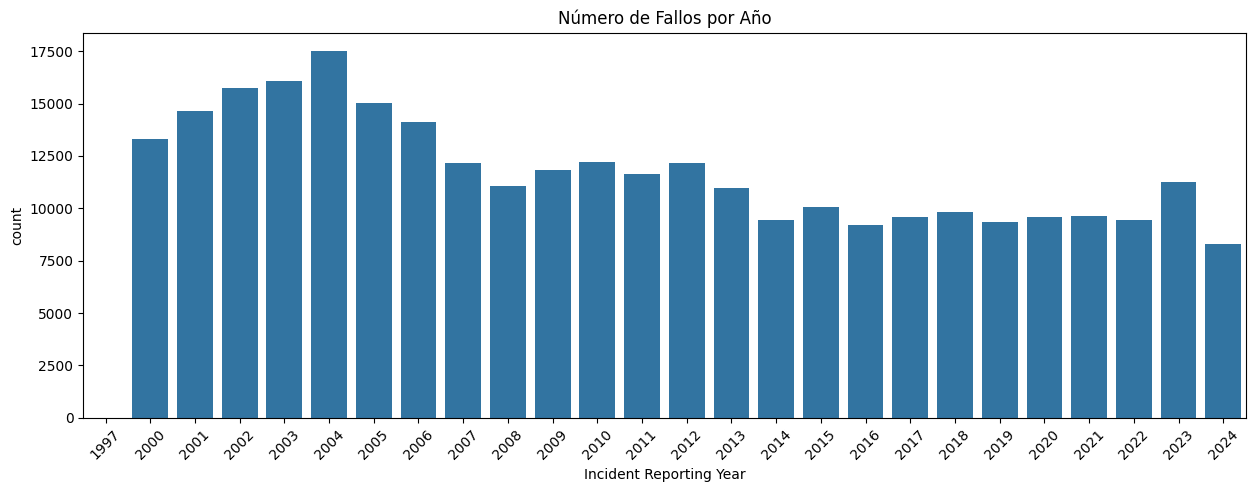

In [ ]:
# Número de fallos por año
plt.figure(figsize=(15, 5))
sns.countplot(data=outages_df, x='Incident Reporting Year')
plt.title('Número de Fallos por Año')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# prompt: quiero saber cuantos diferentes datos hay sobre la columna District name

num_unique_districts = outages_df['District Name'].nunique()
print(f"El número de distritos diferentes es: {num_unique_districts}")

El número de distritos diferentes es: 11


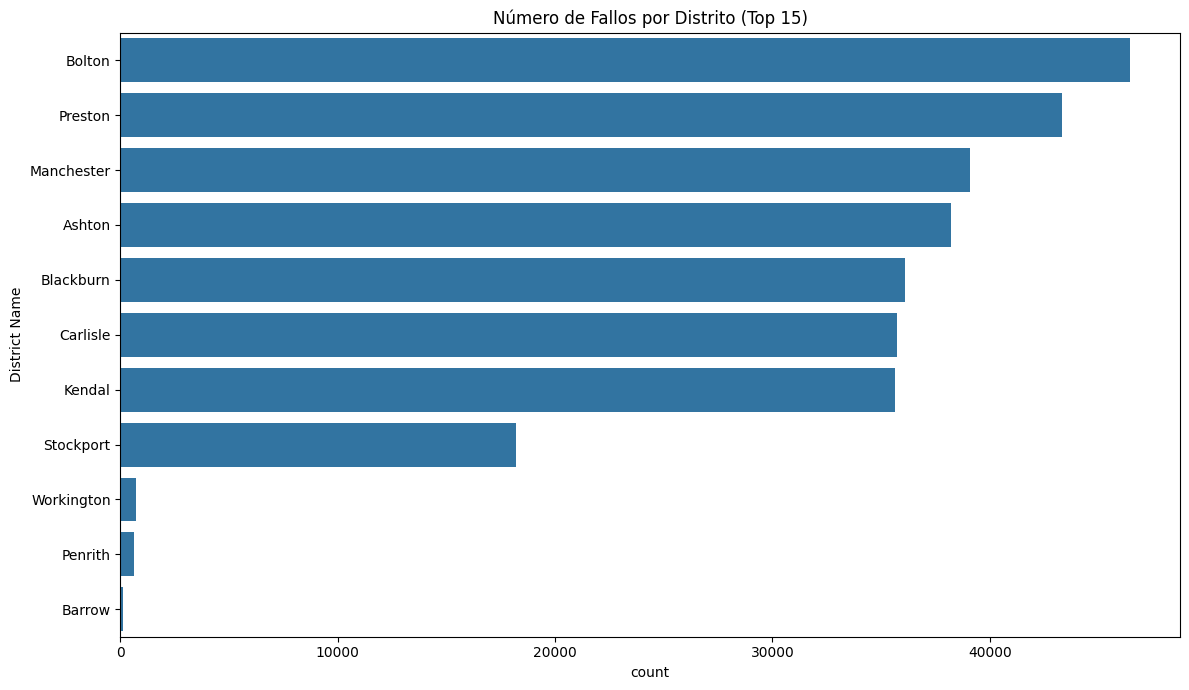

In [ ]:
# Número de fallos por 'District Name' (si hay muchos, muestra los N principales)
top_districts = outages_df['District Name'].value_counts().nlargest(15).index
plt.figure(figsize=(12, 7))
sns.countplot(data=outages_df[outages_df['District Name'].isin(top_districts)], y='District Name', order=top_districts)
plt.title('Número de Fallos por Distrito (Top 15)')
plt.tight_layout()
plt.show()